# ~ ~ ~ Spectral Diagnostics using IBIS data ~ ~ ~ 

### In this notebook

We will work with filtergraph (Fabry-Perot) observations made in three different spectral lines: 

- H$\alpha$, typical, very NLTE chromospheric spectral line. It is very weakly coupled to the local atmospheric conditions due to scattering, so intensity does not directly yield temperature information. It is sensitive to velocity, even if the core is often very "flat", so noise is an issue. 

- Ca II 8542, formed in the lower chromosphere, probing typically lower regions than H$\alpha$, more narrow so more usable for magnetic and velocity field diagnostics. Also typical NLTE line but somewhat coupled to temperature

- Na I D 1, typically probing photosphere and temperature minimum, again typical NLTE line formed by scattering so it only yields temperature information about photospheric layers. Usable for velocity and magnetic field diagnostics. 

### Of note, with respect yesterday's exercise with FISS:


- We have the added diagnostics of sodium (Na I D1);

- these are filtergraphs' data, so the line is not sampled all the way to the continuum;

- the spatial resolution is sensibly higher (around diffraction limit for our data, ~ 0.2" at Halpha; vs. a nominal 0.32" for FISS, but without reconstruction this can easily become 0.5")) 

In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [45]:
# We will import some basic packages:

from astropy.io import fits
import numpy as np 
import matplotlib.pyplot as plt 

# set this variable to the directory where the downloaded data can be found
#data_dir = '/Path/to/data/directory/data/Velocity_IBIS/'

data_dir = '/Users/gcauzzi/Level2/WFA_June2021_workshop/data/Velocity_IBIS/'

In [47]:
# First we will open the most dramatic spectral line, H alpha

# set this variable to the directory where the downloaded data can be found
#data_dir = '/Volumes/Sansa1/Users/kreardon/ATST/Workshop4/data/Velocity_IBIS/'

cube_halpha = fits.open(data_dir + "IBIS.Halpha.fits")[0].data
cube_halpha.shape

(45, 1000, 1000)

In [48]:
# We have 45 wavelength points, at 1000 x 1000 pixels! (Each pixel is 0.096 arcsec). 
# note that the data was written as x,y,lambda; python reads it in its own way.... 
# Let's put it in the more used format, (x,y, lambda)

In [49]:
cube_halpha=np.transpose(cube_halpha,[1,2,0])
cube_halpha.shape

(1000, 1000, 45)

Now, we will calculate to spatially averaged spectrum to see what are we dealing with here. It is good to see how our spectral line looks like. To plot that in  meaningful way we will also need wavelengths. They are in the same directory:

In [50]:
ll_halpha = fits.open(data_dir + "IBIS.Halpha.wav.fits")[0].data
ll_halpha.shape

(45,)

 45 wavelengthts for 45 wavelength points, looks good so far!

In [51]:
mean_spectrum = np.mean(cube_halpha,axis=(0,1))
mean_spectrum.shape

(45,)

Text(0.5, 1.0, 'Spatially averaged spectrum')

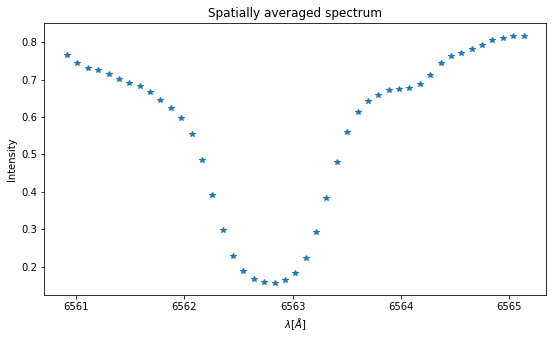

In [52]:
plt.figure(figsize=[9,5])
plt.plot(ll_halpha,mean_spectrum,'*')
#plt.plot(mean_spectrum,'*')
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Looks like H$\alpha$ indeed! Discuss a little bit the line shape here. Also the wing extension (or lack thereof)


Note: the wavelength points are 1) many; 2) evenly spaced. Wonder why?

(BTW, the spectral step is ~ 96 mA)

In [53]:
ll0 = 6562.79    # line core center for average profile

Text(0.5, 1.0, 'Random Wavelength')

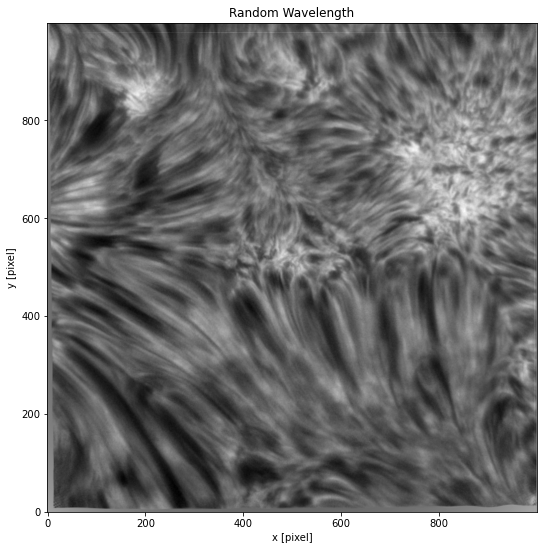

In [54]:
# Let's show an image to check on the FOV.  
plt.figure(figsize=[9,9])

plt.imshow(cube_halpha[:,:,22],cmap='gray',origin='lower')

plt.xlabel("x [pixel]")
plt.ylabel("y [pixel]")
plt.title("Random Wavelength")

Very much like H$\alpha$ indeed! The field of view is not as quiet as the FISS one, used yesterday





#### Now let's plot images at a few different wavelengths, to confirm Ivan's favorite sentence: "Different wavelengths probe different depths" 

Text(0.5, 1.0, 'Wavelength = +0.042 Å')

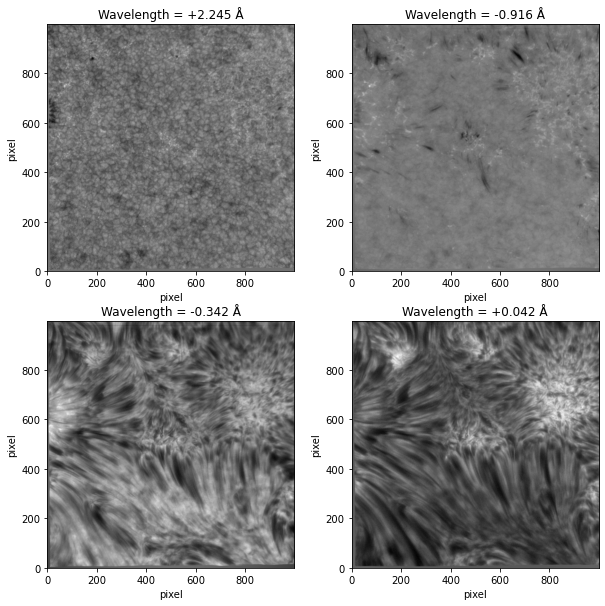

In [55]:
# 
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.imshow(cube_halpha[:,:,43],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[43]-ll0)+" Å")
plt.subplot(222)
plt.imshow(cube_halpha[:,:,10],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[10]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[10]-ll0)+" Å")

plt.subplot(223)
plt.imshow(cube_halpha[:,:,16],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[16]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[16]-ll0)+" Å")

plt.subplot(224)
plt.imshow(cube_halpha[:,:,20],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[21]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[20]-ll0)+" Å")



What do we see? Comparsion with the FISS data of yesterday? 


Let's try to zoom in 

Text(0.5, 1.0, 'Wavelength = +0.137 Å')

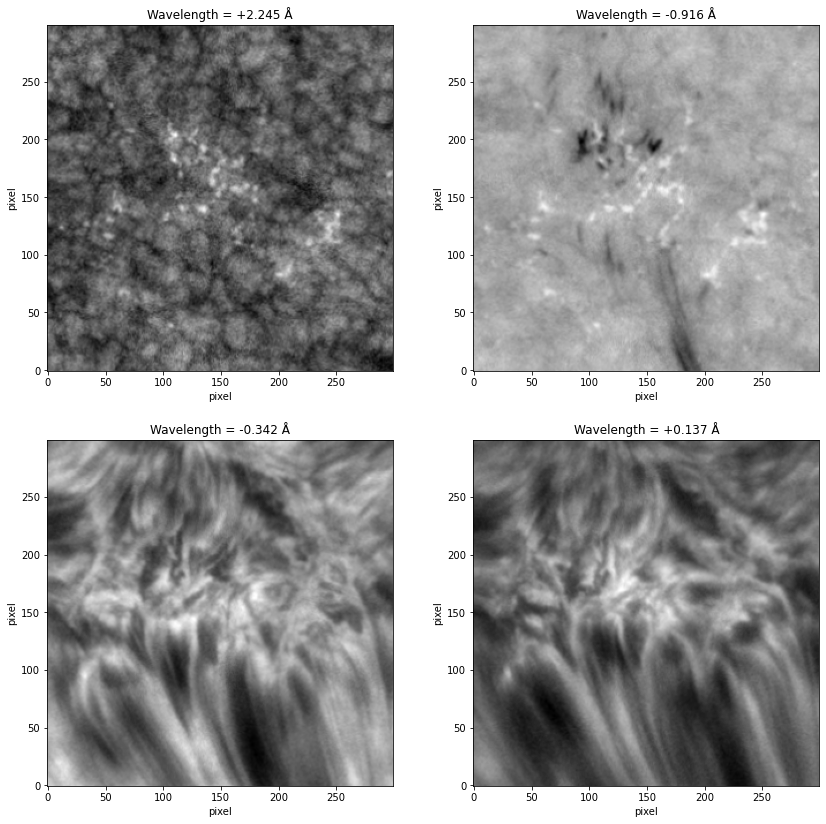

In [56]:
# 
plt.figure(figsize=[14,14])
plt.subplot(221)
plt.imshow(cube_halpha[350:650,350:650,0],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[0]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[43]-ll0)+" Å")


plt.subplot(222)
plt.imshow(cube_halpha[350:650,350:650,10],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[10]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[10]-ll0)+" Å")

plt.subplot(223)
plt.imshow(cube_halpha[350:650,350:650,16],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[16]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[16]-ll0)+" Å")

plt.subplot(224)
plt.imshow(cube_halpha[350:650,350:650,21],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[21]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[21]-ll0)+" Å")



The first "wing image" is taken around the knee - a sharp transition of opacity from the deep photosphere to chromospheric heights !



Many fibrilar structures in the blue wing (also in the red, if you were to look). 

Careful: they are NOT all extreme blueshift of the line !!!! (at this wavelength, they would be over 40 km/s )

Let's put this aside for a minute, and repeat the exercise with both CaII and NaD1, so to see the similarities, differences. In particular, we have not yet seen any Sodium data at high res.....

In [57]:
cube_ca = fits.open(data_dir + "IBIS.CaII.fits")[0].data
ll_ca = fits.open(data_dir + "IBIS.CaII.wav.fits")[0].data
cube_ca = np.transpose(cube_ca,[1,2,0])
mean_spectrum_ca = np.mean(cube_ca,axis=(0,1))
cube_ca.shape

(1000, 1000, 75)

In [58]:
cube_na = fits.open(data_dir + "IBIS.NaD1.fits")[0].data
ll_na = fits.open(data_dir + "IBIS.NaD1.wav.fits")[0].data
cube_na = np.transpose(cube_na,[1,2,0])
mean_spectrum_na = np.mean(cube_na,axis=(0,1))
cube_na.shape

(1000, 1000, 132)

Text(0.5, 1.0, 'Spatially averaged spectrum')

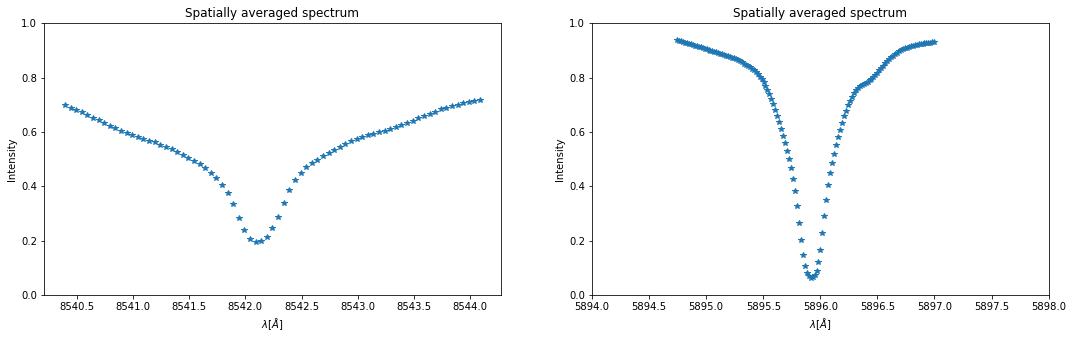

In [59]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.plot(ll_ca,mean_spectrum_ca,'*')
#plt.plot(mean_spectrum,'*')
plt.ylim([0,1])
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

plt.subplot(1,2,2)
plt.plot(ll_na,mean_spectrum_na,'*')
#plt.plot(mean_spectrum,'*')
plt.ylim([0,1])
plt.xlim([5894.,5898.])
plt.xlabel("$\\lambda [\\AA]$")
plt.ylabel("Intensity")
plt.title("Spatially averaged spectrum")

Note the Intensity /wavevelngths limits are the same (on purpose) !
(Spectral step is ~50 mA for CaII; 17 mA for Na D1)

Line center for CaII = 8542.11
NaD1 = 5895.92

Now, what does the FOV look like in these lines? You can explore a bit on your own.


Let's summarize it: an image in the wing of the CaII, and the other in the core of each line

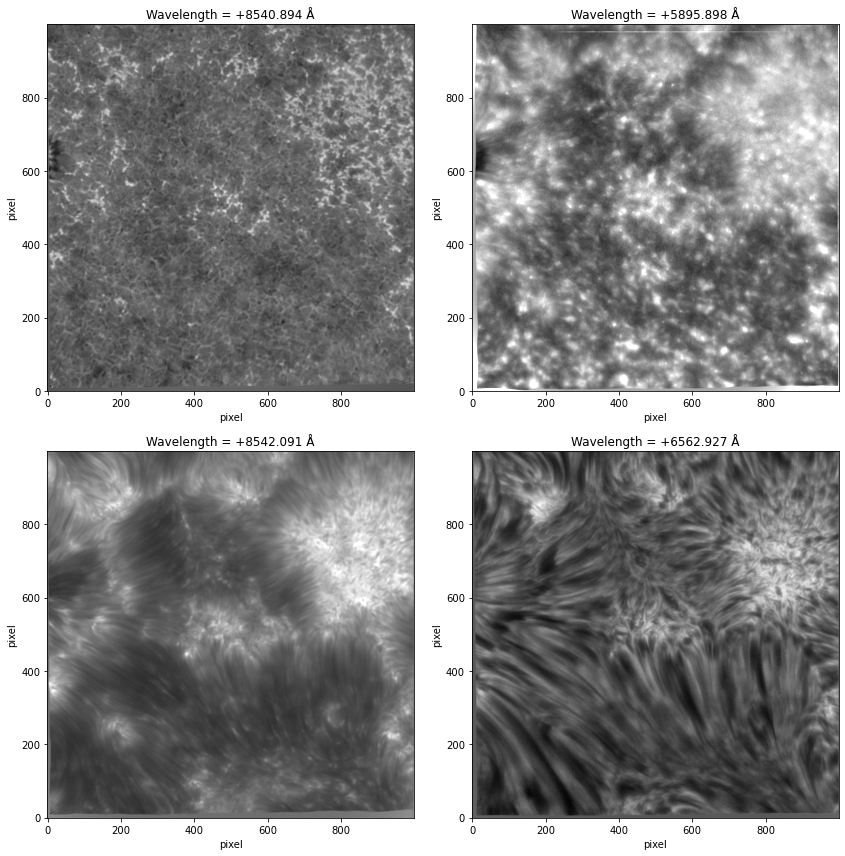

In [60]:
# 
plt.figure(figsize=[12,12])
plt.subplot(221)

#  wing of CaII; 
plt.imshow(cube_ca[:,:,10],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[10]))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_ca[10])+" Å")

#
plt.subplot(222)
plt.imshow(cube_na[:,:,67],cmap='gray',origin='lower',vmin=.03,vmax=0.1)
#plt.imshow(cube_na[67,:,:],cmap='Greys',origin='lower') # might show better as reversed intensity
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_na[67]))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_na[67])+" Å")

plt.subplot(223)
plt.imshow(cube_ca[:,:,34],cmap='gray',origin='lower',vmin=.01,vmax=0.45)
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_ca[34]))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_ca[34])+" Å")

plt.subplot(224)
plt.imshow(cube_halpha[:,:,20],cmap='gray',origin='lower')
plt.xlabel("pixel")
plt.ylabel("pixel")
plt.title("Wavelength = "+str(ll_halpha[21]-ll0))
plt.title("Wavelength = "+"{:+0.3f}".format(ll_halpha[21])+" Å")

plt.tight_layout()


#### Some considerations: 

1. the wings of CaII are very sensitive to magnetic elements (they formed in mid-photosphere, where magnetic elements are hotter than the surroundings). This is the basis for the (power-law) relationship between CaII H&K intensity, as measured by broad band filters, and the magnetic flux (Skumanich et al. 1975; Schrijver et al. 1989, 1996). Cf. lecture by Kevin; 
2. the core of Na has a similar behavior (cf. e.g. Cauzzi et al 2000, Leenaarts et al 2010. Cauzzi et al derived an actual "calibration curve" between brightness of Na core and value of field, at least for non-active region). However, the line is a strongly scattering one, so there is a lot of "fuzz" around those bright elements; 
3. even close to core, CaII fibrils are not fully opaque, and show some bright points "underneath". These are probably the tell-tale of acoustic shocks (cf. Vecchio et al. 2009, Martinez Sykora et al 2015); 
4. the core intensity of Halpha is hard to decipher in and by itself (cf. Cauzzi et al 2009; Leenaarts et al. 2012; Rutten 2017...)

#### Let's move on. 

As these datasets have a sensibly higher spatial resolution than the FISS one (around 2x2 or more), and the FOV is more "active", maybe the profiles will show some more extreme features?
Let's pick some random indices and plot these spectra

In [61]:
sample_x = np.random.choice(999,3)
sample_y = np.random.choice(999,3)
print (sample_x, sample_y)

# careful, these are "python" indeces, so the first we give is the y in the above images ...

[908 473 934] [465 938 539]


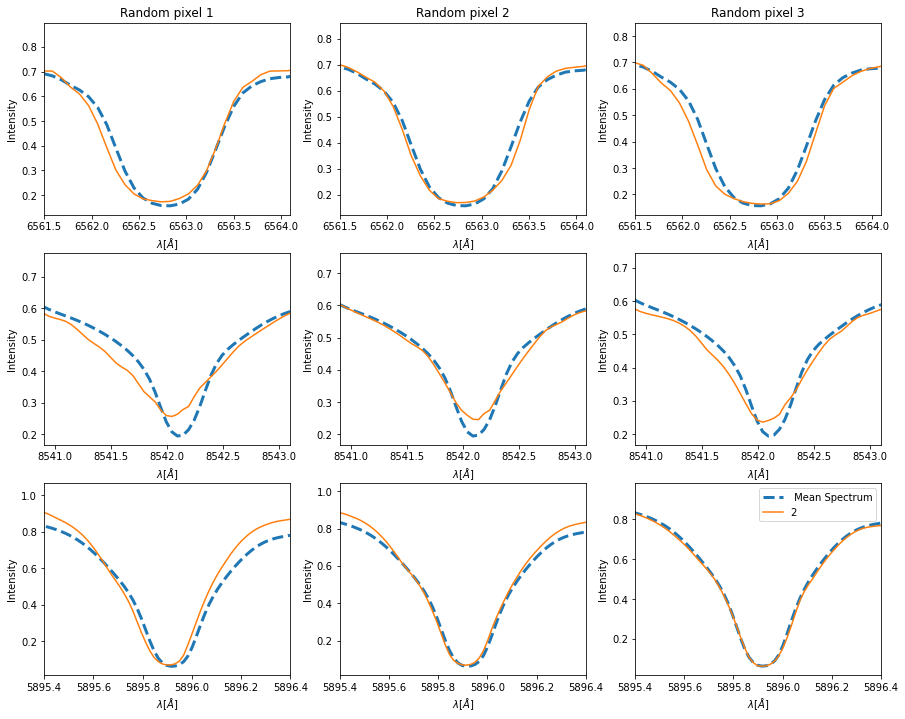

In [62]:
plt.figure(figsize=[15,12])
title=['Random pixel 1','Random pixel 2','Random pixel 3']

for i in range (0,3):
    plt.subplot(3,3,i+1)
    plt.plot(ll_halpha,mean_spectrum,'--',linewidth=3,label='H$\alpha$ Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.xlim([6561.5,6564.1])
    plt.ylabel("Intensity")
    plt.title(title[i])
#for i in range(0,3):
    plt.plot(ll_halpha,cube_halpha[sample_x[i],sample_y[i],:])


    plt.subplot(3,3,i+4)
    plt.plot(ll_ca,mean_spectrum_ca,'--',linewidth=3,label='Ca II Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.xlim([8540.9,8543.1])
    plt.ylabel("Intensity")
#for i in range(0,3):
    plt.plot(ll_ca,cube_ca[sample_x[i],sample_y[i],:])

    plt.subplot(3,3,i+7)
    plt.plot(ll_na,mean_spectrum_na,'--',linewidth=3,label=' Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.ylabel("Intensity")
    plt.xlim([5895.4,5896.4])
#for i in range(0,3):
    plt.plot(ll_na,cube_na[sample_x[i],sample_y[i],:],label = i)

plt.legend()

### Quite some variety ...
#### Indeed, more than what we saw in the FISS data set. Some considerations:

- The sodium line never shows extreme variations
- As we know by now, the CaII line is the most sensitive one to different chromospheric conditions: indeed we observe strong variations in the core intensity, global shifts, as well as large asymmetries
- The Halpha is more "placid", showing mostly a broadening, rathen than asymmetries. Following discussion of day 1 & yesterday, this would indicate some intense heating. 

### But, some extreme profiles do exist
You can go look for them on your own, or we can plot a few that we identified (care that the indices are given in python style ..): a plage element; the inner part CaII fibril; the "edge" of a fibril seen in Ha blue wing (at about 0.9 A; what would be often called a "spicule")

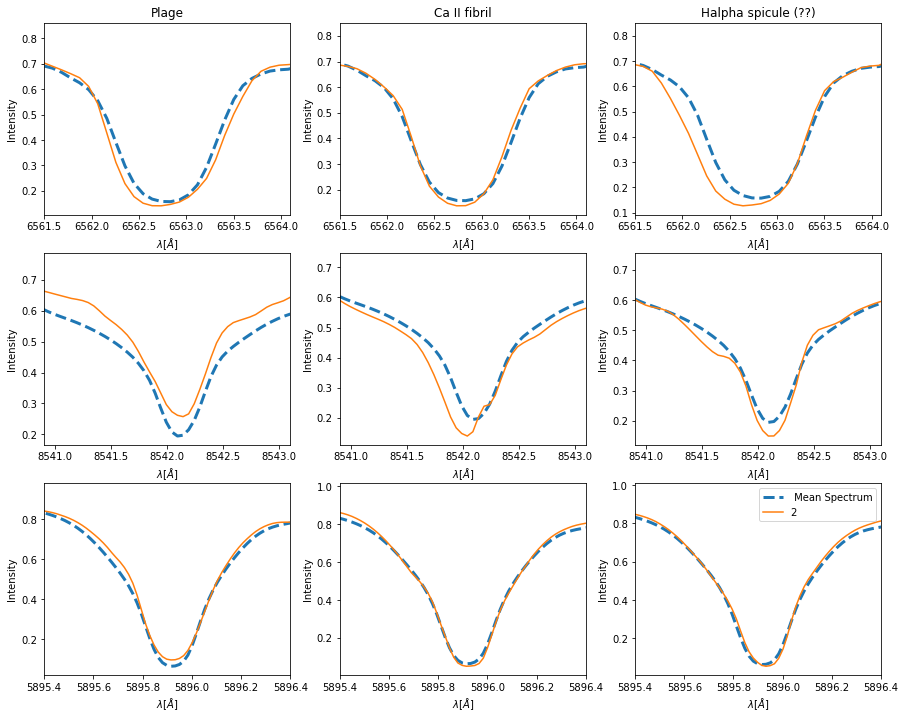

In [22]:
sample_x=[522,155,373] # 
sample_y=[133,560,526]

plt.figure(figsize=[15,12])
title=['Plage','Ca II fibril','Halpha spicule (??)']

for i in range (0,3):
    plt.subplot(3,3,i+1)
    plt.plot(ll_halpha,mean_spectrum,'--',linewidth=3,label='H$\alpha$ Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.xlim([6561.5,6564.1])
    plt.ylabel("Intensity")
    plt.title(title[i])
#for i in range(0,3):
    plt.plot(ll_halpha,cube_halpha[sample_x[i],sample_y[i],:])


    plt.subplot(3,3,i+4)
    plt.plot(ll_ca,mean_spectrum_ca,'--',linewidth=3,label='Ca II Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.xlim([8540.9,8543.1])
    plt.ylabel("Intensity")
#for i in range(0,3):
    plt.plot(ll_ca,cube_ca[sample_x[i],sample_y[i],:])

    plt.subplot(3,3,i+7)
    plt.plot(ll_na,mean_spectrum_na,'--',linewidth=3,label=' Mean Spectrum')
    plt.xlabel("$\\lambda [\\AA]$")
    plt.ylabel("Intensity")
    plt.xlim([5895.4,5896.4])
#for i in range(0,3):
    plt.plot(ll_na,cube_na[sample_x[i],sample_y[i],:],label = i)

plt.legend()

### What do these profiles mean ??? 

Not an obvious question, but it is important to go beyond the first appearance. 

- Pixel 1 (the plage element) shows higher intensity in the core of Na, compatible with what we said before, and with the higher intensity in core and wings of CaII, as well. The CaII is very asymmetric - looks like the opposite sense of what we saw in the exercise with the models on day 1. Maybe larger downflows in the upper part of the chromosphere? The Halpha is broadened and somewhat asymmetric
- Pixel 2 (CaII fibrils) shows a rather broadened profile in CaII, with a small"bump" on the red wing. This is  a tough one! the bump on the red wing might suggest what has been called Rapid Red-shifted Events (RRE, Sekse et al. 2013) but that does not match with the strong blueshift of the line core. To top it off, Halpha does not change much at all ..... As always, sodium doesn't care :-)
- Pixel 3 looks a lot of what would be called a "type II spicule" if looking in monochromatic Halpha blue wing. If you go at ll_halpha[10] = -0.9 Ang, you would clearly see these two long and thin features just below the center of the image. At face value,this is -40 km/s !! And the bump in the blue wing of CaII might be interpred as an additional component (RBE ? Rouppe von der Voort et al. 2009) However, the Halpha spectrum is much broader than the average profile, and does NOT have a bump - but a sensible blueshift (7 km/s). This might speak towards a thermodynamic effect in the region of formation. Let's remember that a broad Halpha profile is correlated with local heating (e.g. Molnar et al. 2019)

### Bottom line: be careful in your interpretation ! 